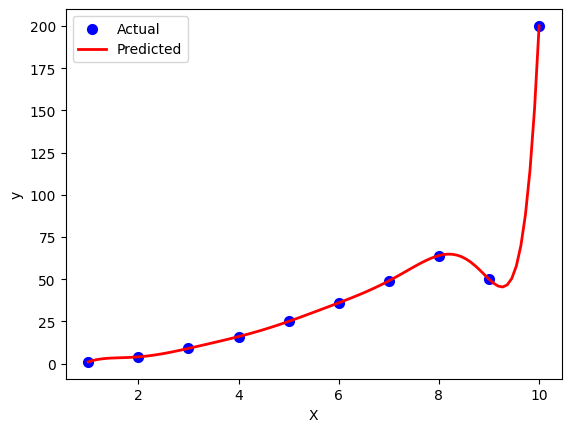

In [ ]:
#Polynomial Regression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

X = np.array([1,2,3,4,5,6,7,8,9,10])
Y = np.array([1,4,9,16,25,36,49,64,50,200])
X,Y = X.reshape(-1,1), Y.reshape(-1,1)

poly_features = PolynomialFeatures(degree=10)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

X_test = np.array([1,2,3,4,5,6,7,8,9,10])
X_test = X_test.reshape(-1,1)
X_test = poly_features.fit_transform(X_test)

# y_pred = model.predict(X_test)

X_plot = np.linspace(1, 10, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, Y, color='blue', linewidths=2,label='Actual')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


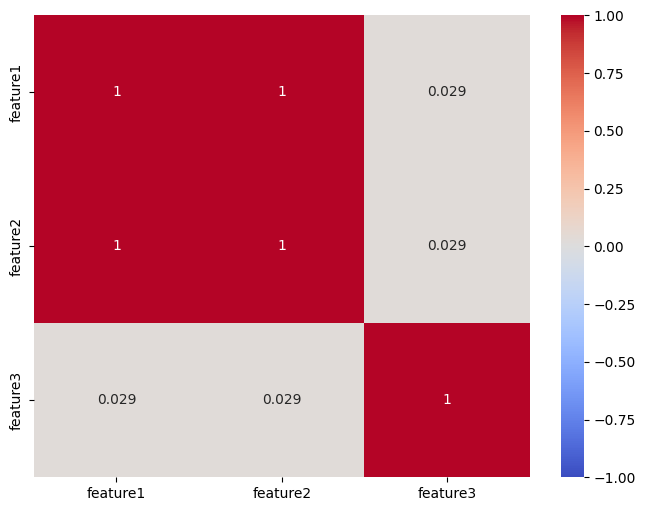

In [ ]:
#Correlation matrix

import pandas as pd
import seaborn as sns

data = {'feature1':[1,2,3,4,5],
        'feature2':[10000,20000,30000,40000,50000],
        'feature3':[-1,3,100,-1,5]}

dataframe = pd.DataFrame(data)
corr_matrix = dataframe.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

100   -10.384652
101   -10.384652
102   -10.384652
103   -10.384652
104   -10.384652
         ...    
195   -10.384652
196   -10.384652
197   -10.384652
198   -10.384652
199   -10.384652
Name: predicted_mean, Length: 100, dtype: float64


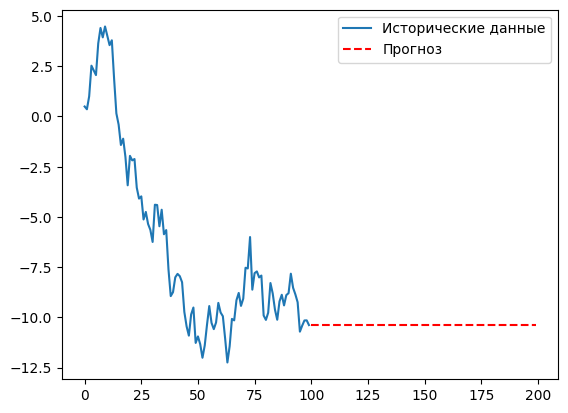

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


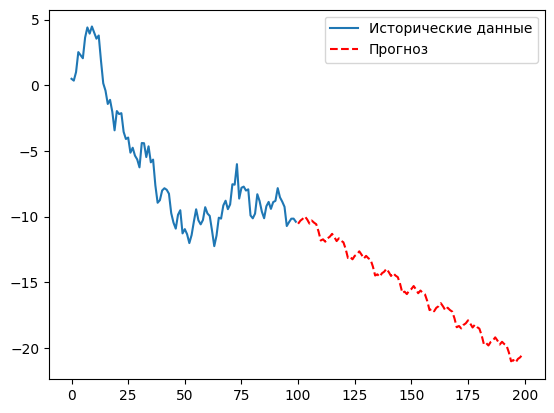

In [ ]:
#ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Генерируем искусственные данные
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # случайный временной ряд
df = pd.DataFrame(data, columns=["value"])

# Обучение модели ARIMA (p, d, q)
p, d, q = 0, 1, 0  # параметры модели
model = ARIMA(df["value"], order=(p, d, q))
fitted_model = model.fit()

# Прогноз на 10 шагов вперед
forecast = fitted_model.forecast(steps=100)
print(forecast)

# Визуализация
plt.plot(df.index, df["value"], label="Исторические данные")
plt.plot(range(len(df), len(df) + 100), forecast, label="Прогноз", linestyle="dashed", color="red")
plt.legend()
plt.show()

#Sarima

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Параметры SARIMA (p, d, q) x (P, D, Q, m)
model = SARIMAX(df["value"], order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
fitted_model = model.fit()

# Прогноз
forecast = fitted_model.forecast(steps=100)

plt.plot(df.index, df["value"], label="Исторические данные")
plt.plot(range(len(df), len(df) + 100), forecast, label="Прогноз", linestyle="dashed", color="red")
plt.legend()
plt.show()

In [ ]:
#Logit/Probit/Tobit

In [ ]:
#Weighted Least Squares

In [ ]:
#Descriptive Statistics

In [ ]:
#Generalized Least Squares

In [ ]:
#Ridge & Lasso Regression

In [ ]:
#GARCH/ARCH

In [ ]:
#Stepwise Regression